In [230]:
import numpy as np
import matplotlib.pyplot as plt
import math

path = "./BTPData/Distance"

def unique_rows(a):
    a = np.ascontiguousarray(a)
    unique_a = np.unique(a.view([('', a.dtype)]*a.shape[1]))
    return unique_a.view(a.dtype).reshape((unique_a.shape[0], a.shape[1]))

def delNaN(a,b):
    count = 0
    for i in range(len(a)):
        if(math.isnan(a[i])):
            count = count + 1
        
    for i in range(len(a) - count):
        if(math.isnan(a[i])):
            a = np.delete(a, (i), axis = 0)
            b = np.delete(b, (i), axis = 0)
            i = i - 1
    return a,b

# No Jammer

In [231]:
a = np.loadtxt(path + "/rss_nojammer_node2.txt")
a = 10*np.log10(1000*a)
b = np.loadtxt(path + "/pdr_nojammer_node2.txt")

a,b = delNaN(a,b)

d = a.reshape(len(a),1)
e = b.reshape(len(b),1)

data = np.concatenate((d,e),axis = 1)
data = unique_rows(data)
for i in range(len(data)):
    if(data[i][0] < -93.5):
        data[i][0] = -84
        data[i][1] = 2
data = unique_rows(data)
idx = 0
for i in range(len(data)):
    if(data[i][1] == 2):
        idx = i
data = np.delete(data, (idx), axis = 0)
np.random.shuffle(data)
data1 = data
print(len(data1))

5070


# Constant Jammer

In [232]:
a = np.loadtxt(path + "/rss_constantjammer_node2.txt")
a = 10*np.log10(1000*a)
b = np.loadtxt(path + "/pdr_constantjammer_node2.txt")

a,b = delNaN(a,b)

d = a.reshape(len(a),1)
e = b.reshape(len(b),1)


data = np.concatenate((d,e),axis = 1)
data = unique_rows(data)
for i in range(len(data)):
    if(data[i][0] < -93.5):
        data[i][0] = -84
        data[i][1] = 2
data = unique_rows(data)
idx = 0
for i in range(len(data)):
    if(data[i][1] == 2):
        idx = i
data = np.delete(data, (idx), axis = 0)
np.random.shuffle(data)
data2 = data
print(len(data2))


10901


# Reactive Jammer

In [233]:
a = np.loadtxt(path + "/rss_reactivejammer_node2.txt")
a = 10*np.log10(1000*a)
b = np.loadtxt(path + "/pdr_reactivejammer_node2.txt")

a,b = delNaN(a,b)

d = a.reshape(len(a),1)
e = b.reshape(len(b),1)
data = np.concatenate((d,e),axis = 1)
data = unique_rows(data)
for i in range(len(data)):
    if(data[i][0] < -93.5):
        data[i][0] = -84
        data[i][1] = 2
data = unique_rows(data)
idx = 0
for i in range(len(data)):
    if(data[i][1] == 2):
        idx = i
data = np.delete(data, (idx), axis = 0)
np.random.shuffle(data)
data3 = data
print(len(data3))

9514


# Random Jammer

In [234]:
a = np.loadtxt(path + "/rss_randomjammer_node2.txt")
a = 10*np.log10(1000*a)
b = np.loadtxt(path + "/pdr_randomjammer_node2.txt")

a,b = delNaN(a,b)

d = a.reshape(len(a),1)
e = b.reshape(len(b),1)

data = np.concatenate((d,e),axis = 1)
data = unique_rows(data)
for i in range(len(data)):
    if(data[i][0] < -93.5):
        data[i][0] = -84
        data[i][1] = 2
data = unique_rows(data)
idx = 0
for i in range(len(data)):
    if(data[i][1] == 2):
        idx = i
data = np.delete(data, (idx), axis = 0)
np.random.shuffle(data)
data4 = data
print(len(data4))

4614


/home/ansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


# Plotting Graph

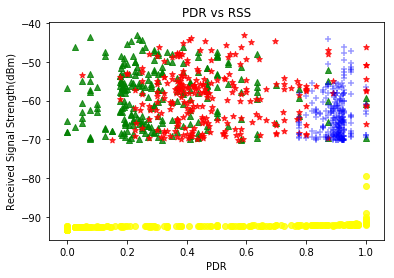

In [235]:
noOfData = 250

plt.scatter(data1[:noOfData,1], data1[:noOfData,0], marker = 'o', alpha = 0.8, color = ['yellow'])
plt.scatter(data2[:noOfData,1], data2[:noOfData,0], marker = '^', alpha = 0.8, color = ['green'])
plt.scatter(data3[:noOfData,1], data3[:noOfData,0], marker = '*', alpha = 0.8, color = ['red']) 
plt.scatter(data4[:noOfData,1], data4[:noOfData,0], marker = '+', alpha = 0.4, color = ['blue'])

plt.title('PDR vs RSS')
# naming the x axis 
plt.xlabel('PDR') 
# naming the y axis d
plt.ylabel('Received Signal Strength(dBm)')

# function to show the plot
# plt.show('a.png')
plt.savefig('Distance')

# Data Set Prep

In [236]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
min_max_scaler = preprocessing.MinMaxScaler()

# No Jammer
c = np.zeros((len(data1),1))
data = min_max_scaler.fit_transform(data1)
train_features1 = np.concatenate((data,c),axis = 1)
train_features1 = train_features1[0:4400]
print(train_features1.shape)

#Constant Jammer
c = np.ones((len(data2),1))
data = min_max_scaler.fit_transform(data2)
train_features2 = np.concatenate((data,c),axis = 1)
train_features2 = train_features2[0:4400]
print(train_features2.shape)

#Reactive Jammer
c =  np.full((len(data3),1),2)
data = min_max_scaler.fit_transform(data3)
train_features3 = np.concatenate((data,c),axis = 1)
train_features3 = train_features3[0:4400]
print(train_features3.shape)

#Random Jammer
c =  np.full((len(data4),1),3)
data = min_max_scaler.fit_transform(data4)
train_features4 = np.concatenate((data,c),axis = 1)
train_features4 = train_features4[0:4400]
print(train_features4.shape)

#Combine all
train_features = np.concatenate((train_features1,train_features2, train_features3, train_features4),axis = 0)
np.random.shuffle(train_features)
print(train_features.shape)


train_data, test_data, train_label, test_label = train_test_split(train_features[:,0:2], train_features[:,2], 
                                                                  test_size = 0.2, random_state = 1)

accuracies = np.zeros(4)

(4400, 3)
(4400, 3)
(4400, 3)
(4400, 3)
(17600, 3)


# K Nearest Neighbours

In [242]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 35)
classifier.fit(train_data, train_label)
predictions = classifier.predict(test_data)
print("Accuracy:",metrics.accuracy_score(test_label, predictions))
accuracies[0] = metrics.accuracy_score(test_label, predictions)

Accuracy: 0.6857954545454545


In [243]:
confusion_matrix(test_label,predictions)

array([[914,   0,   9,   0],
       [ 72, 497, 250,  84],
       [ 52, 163, 461, 167],
       [ 90,  78, 141, 542]])

# Decision Tree

In [244]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(train_data,train_label)
predictions = clf.predict(test_data)  
print("Accuracy:",metrics.accuracy_score(test_label, predictions))
accuracies[1] = metrics.accuracy_score(test_label, predictions)

Accuracy: 0.9198863636363637


In [245]:
confusion_matrix(test_label,predictions)

array([[859,  18,  21,  25],
       [  7, 837,  23,  36],
       [  7,  35, 776,  25],
       [ 11,  45,  29, 766]])

# Random Forest

In [246]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(train_data, train_label)
predictions = rf.predict(test_data)
accuracy = metrics.accuracy_score(test_label, predictions)
accuracies[2] = accuracy
print("Accuracy:", accuracy)

Accuracy: 0.875


In [247]:
confusion_matrix(test_label,predictions)

array([[858,  14,  15,  36],
       [  7, 793,  60,  43],
       [  7,  75, 684,  77],
       [ 13,  43,  50, 745]])

# Gradient Boosting

In [250]:
from sklearn import ensemble
params = {
    'n_estimators': 5,
    'max_depth': 10,
    'learning_rate': 0.4,
    'criterion': 'mse'
}
gradient_boosting_classifier = ensemble.GradientBoostingClassifier(**params)
gradient_boosting_classifier.fit(train_data, train_label)
predictions = gradient_boosting_classifier.predict(test_data)
print("Accuracy:",metrics.accuracy_score(test_label, predictions))
accuracies[3] = metrics.accuracy_score(test_label, predictions)

Accuracy: 0.9443181818181818


In [251]:
confusion_matrix(test_label,predictions)

array([[890,   3,   8,  22],
       [ 13, 842,  21,  27],
       [ 12,  19, 792,  20],
       [ 22,  22,   7, 800]])

<BarContainer object of 4 artists>

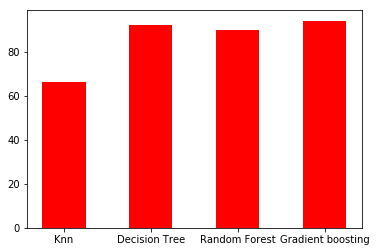

In [30]:
y = accuracies*100
N = len(y)
x = ['Knn','Decision Tree','Random Forest', 'Gradient boosting']
width = 1/2
plt.bar(x, y, width, color="red")